In [13]:
# https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34

import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import model_selection, naive_bayes, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import itertools
# import catboost
# from catboost import CatBoostClassifier
# import rb

import pickle

['positive' 'neutral']


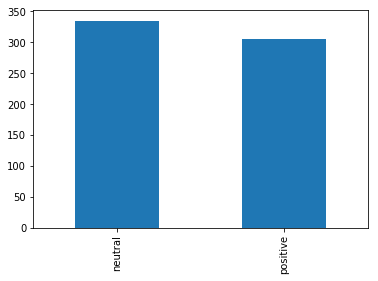

In [14]:

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

data = pd.read_csv(
    'data/student_evaluation.csv',
    dtype={'Sentiment': object})
unique = data.Sentiment.unique()
print(unique)
data['Sentiment'].value_counts().plot(kind="bar")
plt.show()

# train/test data split
train, test = train_test_split(data, test_size=0.2)

In [15]:
from sklearn.model_selection import cross_val_score
# cross validation score for Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
print(cross_val_score(nb, news_classifier.train_vectors,
        news_classifier.train_labels, cv=10, scoring='accuracy').mean())

0.71135591129

# cross validation score for SVM
svm_model = svm.SVC(kernel='linear')
print(cross_val_score(svm_model, news_classifier.train_vectors,
        news_classifier.train_labels,cv=10, scoring='accuracy').mean())

0.73772542533

NameError: name 'news_classifier' is not defined

In [ ]:
np.random.seed(5000)

In [16]:
Corpus = pd.read_csv(r"data/student_evaluation.csv",encoding='latin-1')
# Corpus.head()
Corpus.Sentiment.unique()

array(['positive', 'neutral'], dtype=object)

In [17]:
# Step - a : Remove blank rows if any.
Corpus['comment'].dropna(inplace=True)

# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
Corpus['comment'] = [entry.lower() for entry in Corpus['comment']]

# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
Corpus['comment']= [word_tokenize(entry) for entry in Corpus['comment']]

# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(Corpus['comment']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)

In [18]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['Sentiment'],test_size=0.2)

Corpus['Sentiment'].value_counts()


neutral     335
positive    306
Name: Sentiment, dtype: int64

In [19]:
# Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['suggestion'],test_size=0.2)
# # Train_X
# # Test_Y.describe()
# # type(Test_Y)
# a = Corpus.to_numpy()
# # a = Train_X.to_numpy()
# a.shape
# nos = a[a=='NO']
# CS = a[a == 'CS']
# IS = a[a == 'IS']

# print(nos.shape)
# print(CS.shape)

# print(IS.shape)
# # yes = a[a=='yes']
# # yes.shape
# # Test_Y.unique()

In [20]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
# Test_X.describe

In [21]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
# type(Test_X_Tfidf)
# print(Train_X_Tfidf)
# vectorizer = CountVectorizer(ngram_range=(2,2))
# Tfidf_vect.fit_transform(Corpus['text_final'])

# print(Tfidf_vect.get_feature_names())

# vectorizer = TfidfVectorizer(ngram_range=(2,2)) # You can still specify n-grams here.
# X = vectorizer.fit_transform(arr)

In [22]:
# print(Train_X_Tfidf)

# Naive Bayes

In [23]:

#pipeline model 

text_clf = Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', MultinomialNB()) ])
text_clf.fit(Train_X,Train_Y)

predictions_NB = text_clf.predict(Test_X)


In [27]:
from sklearn.model_selection import cross_val_score
# cross validation score for Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
print(cross_val_score(nb, Train_X_Tfidf,
        Train_Y, cv=10, scoring='accuracy').mean())

# 0.71135591129

# # cross validation score for SVM
# svm_model = svm.SVC(kernel='linear')
# print(cross_val_score(svm_model, news_classifier.train_vectors,
#         news_classifier.train_labels,cv=10, scoring='accuracy').mean())

# 0.73772542533

0.7166289592760181


In [17]:
confusion_matrix_result = confusion_matrix(Test_Y, predictions_NB)
print("Confusion matrix \n",confusion_matrix_result)
print("\n Classification report \n",classification_report(Test_Y, predictions_NB))
print("\n Naive Bayes accuracy score -- > ",accuracy_score(Test_Y, predictions_NB)*100)  

print("\n Naive Bayes precision score -- > ",precision_score(Test_Y, predictions_NB, average = 'weighted')*100)  


Confusion matrix 
 [[42 22]
 [10 55]]

 Classification report 
              precision    recall  f1-score   support

          0       0.81      0.66      0.72        64
          1       0.71      0.85      0.77        65

avg / total       0.76      0.75      0.75       129


 Naive Bayes accuracy score -- >  75.1937984496124

 Naive Bayes precision score -- >  76.06269699292956


In [18]:
# pipeline shortens the steps 
# https://www.youtube.com/watch?v=0kPRaYSgblM
# https://github.com/codewrestling/TextClassification/blob/master/Text%20Classification.py

text_clf = Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', MultinomialNB()) ])
# train the model
text_clf.fit(Train_X,Train_Y)

# Predict the test cases
test_x = ['Few more application specific contents is needed. ','Good course.', 'Please include Field trips.','I think an in class mini-project should be considered to be done step by step in during lectures.']
# test_x = [input()]
predicted = text_clf.predict(test_x)
for x in predicted:
    print(x)
    


0
1
0
0


In [26]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)


# docs = ['Also the project helped us implement real world applications that is further helpful if we plan to do research in this field.']
docs = ['not at all satisfied','Good course.', 'Please include Field trips.','I think an in class mini-project should be considered to be done step by step in during lectures.']

# docs = [input()]
# docs = input()
x_new_tfidf = Tfidf_vect.transform(docs)
predictions = Naive.predict(x_new_tfidf)

for x in predictions:
    print(x)
    
    

0
1
0
0


In [28]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
# predict the labels on validation dataset
from sklearn.metrics import f1_score 
predicted_NB = Naive.predict(Test_X_Tfidf)

confusion_matrix_result = confusion_matrix(Test_Y, predicted_NB)
print("Confusion matrix \n",confusion_matrix_result)
print("\n Classification report \n",classification_report(Test_Y, predicted_NB))
print("\n Naive Bayes accuracy score -- > ",accuracy_score(Test_Y, predicted_NB)*100)  

print("\n Naive Bayes precision score -- > ",precision_score(Test_Y, predicted_NB, average = 'weighted')*100)  

print("\n Naive Bayes recall score -- > ",recall_score(Test_Y, predicted_NB, average = 'weighted')*100)  

print("\n Naive Bayes f1_score -- > ",f1_score(Test_Y, predicted_NB, average = 'weighted')*100)  


Confusion matrix 
 [[40 24]
 [10 55]]

 Classification report 
              precision    recall  f1-score   support

          0       0.80      0.62      0.70        64
          1       0.70      0.85      0.76        65

avg / total       0.75      0.74      0.73       129


 Naive Bayes accuracy score -- >  73.64341085271317

 Naive Bayes precision score -- >  74.76989500539692

 Naive Bayes recall score -- >  73.64341085271317

 Naive Bayes f1_score -- >  73.30624688335826


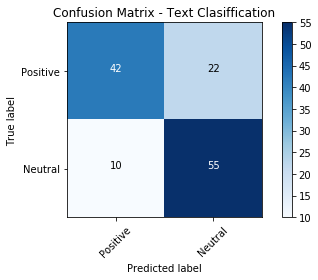

In [30]:
confusion_matrix_NB = confusion_matrix(Test_Y, predictions_NB)

classes = ["Positive","Neutral"]

plt.figure()
plt.imshow(confusion_matrix_NB, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Text Clasiffication")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

text_format = 'd'
thresh = confusion_matrix_NB.max() / 2.
for row, column in itertools.product(range(confusion_matrix_NB.shape[0]), range(confusion_matrix_NB.shape[1])):
    plt.text(column, row, format(confusion_matrix_NB[row, column], text_format),
             horizontalalignment="center",
             color="white" if confusion_matrix_NB[row, column] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()

In [31]:
len(Train_Y)
len(Test_Y)


129

## Bernoulli Naive Bayes

In [33]:

# fit the training dataset on the NB classifier
BNaive = naive_bayes.BernoulliNB()
BNaive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
Bpredictions_NB = BNaive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(Bpredictions_NB, Test_Y)*100)
print("Naive Bayes precision Score -> ",precision_score(Bpredictions_NB, Test_Y, average = 'weighted')*100)



Naive Bayes Accuracy Score ->  68.21705426356588
Naive Bayes precision Score ->  75.82457513416816


In [36]:
#pipeline model 

text_clf = Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', BernoulliNB()) ])
text_clf.fit(Train_X,Train_Y)

Bepredictions_NB = text_clf.predict(Test_X)
print("Naive Bayes Accuracy Score -> ",accuracy_score(Bepredictions_NB, Test_Y)*100)

print("Naive Bayes precision Score -> ",precision_score(Bepredictions_NB, Test_Y, average = 'weighted')*100)


Naive Bayes Accuracy Score ->  69.76744186046511
Naive Bayes precision Score ->  76.20919051878354


# Support Vector Machine SVM

In [31]:
# Classifier - Algorithm - SVM

# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  77.51937984496125


In [32]:
# cross validation score for SVM
svm_model = svm.SVC(kernel='linear')
print(cross_val_score(svm_model, Train_X_Tfidf,
        Train_Y,cv=10, scoring='accuracy').mean())


0.7517345399698341


In [33]:
# from sklearn.model_selection import GridSearchCV
# parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)],
#              'tfidf__use_idf': (True, False),
#              'clf-svm__alpha': (1e-2, 1e-3),
# }
# gs_clf_svm = GridSearchCV(text_clf_SVM, parameters_svm, n_jobs=-1)
# gs_clf_svm = gs_clf_svm.fit(Train_X,Train_Y)
# gs_clf_svm.best_score_
# gs_clf_svm.best_params_


In [34]:
#pipeline model SVM
text_clf_SVM= Pipeline([('vect', TfidfVectorizer(ngram_range=(1,1))), 
                      ('clf', SVC(C=1.0, kernel='linear', degree=3, gamma='auto')) ])
# train the model
text_clf_SVM.fit(Train_X,Train_Y)
predicted_svm = text_clf_SVM.predict(Test_X)
np.mean(predicted_svm == Test_Y)

# Predict the test cases
# test_x = [input()]
# test_x = ['Also the project helped us implement real world applications that is further helpful if we plan to do research in this field.']
# test_x = ['Decision Support Technologies is a required course of IM course. ','no.', 'Please include Field trips.','I think an in class mini-project should be considered to be done step by step in during lectures.']
# test_x = ['Few more application specific contents is needed. ','Good course.', 'Please include Field trips.','I think an in class mini-project should be considered to be done step by step in during lectures.']

# predicted_svm = text_clf_SVM.predict(Test_Y)
# for x in predicted_svm:
#     print(x)

# print("SVM Accuracy Score -> ",accuracy_score(predicted_svm, Test_Y)*100)


0.7596899224806202

In [36]:
text_clf.best_estimator_.predict(Test_X_Tfidf)

AttributeError: 'Pipeline' object has no attribute 'best_estimator_'

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# predictions_SVM = SVM.predict(Test_X_Tfidf)
confusion_matrix_result = confusion_matrix(Test_Y, predicted_svm)
print("Confusion matrix \n",confusion_matrix_result)
print("\n Classification report \n",classification_report(Test_Y, predicted_svm))

print("\n SVM accuracy score -- > ",accuracy_score(Test_Y, predicted_svm)*100) 
print("\n SVM precision score -- > ",precision_score(Test_Y, predicted_svm, average = 'weighted')*100) 

Confusion matrix 
 [[59 14]
 [17 39]]

 Classification report 
              precision    recall  f1-score   support

          0       0.78      0.81      0.79        73
          1       0.74      0.70      0.72        56

avg / total       0.76      0.76      0.76       129


 SVM accuracy score -- >  75.96899224806202

 SVM precision score -- >  75.8748835669692


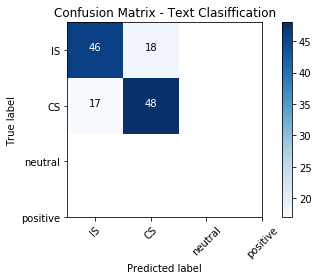

In [40]:
classes = ["IS","CS", "neutral","positive"]

plt.figure()
plt.imshow(confusion_matrix_result, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Text Clasiffication")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

text_format = 'd'
thresh = confusion_matrix_result.max() / 2.
for row, column in itertools.product(range(confusion_matrix_result.shape[0]), range(confusion_matrix_result.shape[1])):
    plt.text(column, row, format(confusion_matrix_result[row, column], text_format),
             horizontalalignment="center",
             color="white" if confusion_matrix_result[row, column] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()

In [75]:
# from sklearn.model_selection import GridSearchCV
# parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)],
#              'tfidf__use_idf': (True, False),
#              'clf-svm__alpha': (1e-2, 1e-3),
# }
# gs_clf_svm = GridSearchCV(text_clf_SVM, parameters_svm, n_jobs=-1)
# gs_clf_svm = gs_clf_svm.fit(Train_X_Tfidf,Train_Y)
# gs_clf_svm.best_score_
# # gs_clf_svm.best_params_

In [ ]:
# save the model
# https://stackabuse.com/text-classification-with-python-and-scikit-learn/
with open('text_classifier', 'wb') as picklefile:
    pickle.dump(SVM,picklefile)

# to load the model use the following
with open('text_classifier', 'rb') as training_model:
    model = pickle.load(training_model)

In [72]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
predictions_SVM = SVM.predict(Test_X_Tfidf)

print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  74.4186046511628


In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predictions_SVM = SVM.predict(Test_X_Tfidf)
confusion_matrix_result = confusion_matrix(Test_Y, predictions_SVM)
print("Confusion matrix \n",confusion_matrix_result)
print("\n Classification report \n",classification_report(Test_Y, predictions_SVM))
print("\n SVM precision score -- > ",precision_score(Test_Y, predictions_SVM, average = 'weighted')*100) 

Confusion matrix 
 [[49 15]
 [18 47]]

 Classification report 
              precision    recall  f1-score   support

          0       0.73      0.77      0.75        64
          1       0.76      0.72      0.74        65

avg / total       0.74      0.74      0.74       129


 SVM precision score -- >  74.48074705243475


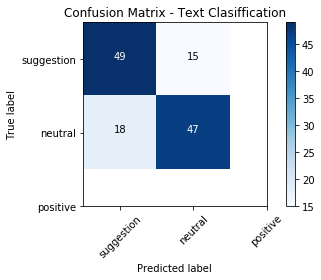

In [44]:
classes = ["suggestion", "neutral","positive"]

plt.figure()
plt.imshow(confusion_matrix_result, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Text Clasiffication")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

text_format = 'd'
thresh = confusion_matrix_result.max() / 2.
for row, column in itertools.product(range(confusion_matrix_result.shape[0]), range(confusion_matrix_result.shape[1])):
    plt.text(column, row, format(confusion_matrix_result[row, column], text_format),
             horizontalalignment="center",
             color="white" if confusion_matrix_result[row, column] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()

In [76]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  49.6124031007752


# XGboost


In [50]:
xgb = XGBClassifier(learning_rate=0.01)
xgb.fit(Train_X_Tfidf,Train_Y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [78]:
#pipeline model XGB
text_clf_XGB= Pipeline([('vect', TfidfVectorizer(ngram_range=(1,1))), 
                      ('clf', XGBClassifier(learning_rate=0.01)) ])
# train the model
text_clf_XGB.fit(Train_X,Train_Y)
predicted_XGB = text_clf_XGB.predict(Test_X)
# np.mean(predicted_XGB == Test_Y)



/home/rounak/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [79]:
confusion_matrix_result = confusion_matrix(Test_Y, predicted_XGB)
print("Confusion matrix \n",confusion_matrix_result)
print("\n Classification report \n",classification_report(Test_Y, predicted_XGB))

print("\n XGBboost accuracy score -- > ",accuracy_score(Test_Y,predicted_XGB)*100)
print("\n XGBoost precision score -- > ",precision_score(Test_Y, predicted_XGB, average = 'weighted')*100) 

Confusion matrix 
 [[57  7]
 [40 25]]

 Classification report 
              precision    recall  f1-score   support

          0       0.59      0.89      0.71        64
          1       0.78      0.38      0.52        65

avg / total       0.69      0.64      0.61       129


 XGBboost accuracy score -- >  63.565891472868216

 XGBoost precision score -- >  68.51899025013986


In [63]:
# make predictions for test data
y_pred = xgb.predict(Test_X_Tfidf)
predictions_xgboost = [round(value) for value in y_pred]

# evaluate predictions
print("xgboost Accuracy Score -> ",accuracy_score(predictions_xgboost, Test_Y)*100)

confusion_matrix_result = confusion_matrix(Test_Y, predictions_xgboost)
print("Confusion matrix \n",confusion_matrix_result)
print("\n Classification report \n",classification_report(Test_Y, predictions_xgboost))
print("\n xgboost accuracy score -- > ",accuracy_score(Test_Y, predictions_xgboost)*100) 

xgboost Accuracy Score ->  63.565891472868216
Confusion matrix 
 [[58  6]
 [41 24]]

 Classification report 
              precision    recall  f1-score   support

          0       0.59      0.91      0.71        64
          1       0.80      0.37      0.51        65

avg / total       0.69      0.64      0.61       129


 xgboost accuracy score -- >  63.565891472868216


/home/rounak/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


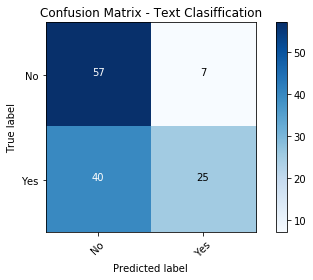

In [56]:
classes = ["No", "Yes"]

plt.figure()
plt.imshow(confusion_matrix_result, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Text Clasiffication")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

text_format = 'd'
thresh = confusion_matrix_result.max() / 2.
for row, column in itertools.product(range(confusion_matrix_result.shape[0]), range(confusion_matrix_result.shape[1])):
    plt.text(column, row, format(confusion_matrix_result[row, column], text_format),
             horizontalalignment="center",
             color="white" if confusion_matrix_result[row, column] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()

In [57]:
text_clf_XGB= Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', XGBClassifier()) ])
# train the model
text_clf_XGB.fit(Train_X,Train_Y)

# Predict the test cases
# test_x = ['Few more application specific contents is needed. ','Good course.', 'Please include Field trips.','I think an in class mini-project should be considered to be done step by step in during lectures.']
test_x = [input()]

predicted_XGB = text_clf_XGB.predict(test_x)
for x in predicted_XGB:
    print(x)

print("SVM Accuracy Score -> ",accuracy_score(predicted_svm, Test_Y)*100)



0
SVM Accuracy Score ->  72.86821705426357


/home/rounak/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Stochastic Gradient 

In [58]:
from sklearn.linear_model import SGDClassifier
#pipeline model SGD
text_clf_sgd= Pipeline([('vect', TfidfVectorizer(ngram_range=(1,1))), 
                      ('clf', SGDClassifier(loss='hinge', penalty='l2',
                    alpha=1e-3, random_state=42,
                    max_iter=5, tol=None)) ])
# train the model
text_clf_sgd.fit(Train_X,Train_Y)
predicted_sgd = text_clf_sgd.predict(Test_X)
np.mean(predicted_sgd == Test_Y)



0.7209302325581395

In [59]:
confusion_matrix_result = confusion_matrix(Test_Y, predicted_sgd)
print("Confusion matrix \n",confusion_matrix_result)
print("\n Classification report \n",classification_report(Test_Y, predicted_sgd))
print("\n SGDboost accuracy score -- > ",accuracy_score(Test_Y,predicted_sgd)*100) 
print("\n SGDboost precision score -- > ",precision_score(Test_Y,predicted_sgd, average = 'weighted')*100) 

Confusion matrix 
 [[42 22]
 [14 51]]

 Classification report 
              precision    recall  f1-score   support

          0       0.75      0.66      0.70        64
          1       0.70      0.78      0.74        65

avg / total       0.72      0.72      0.72       129


 SGDboost accuracy score -- >  72.09302325581395

 SGDboost precision score -- >  72.41159604969735


In [60]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', penalty='l2',
                    alpha=1e-3, random_state=42,
                    max_iter=5, tol=None)
sgd.fit(Train_X_Tfidf,Train_Y)
sgd

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [61]:
# make predictions for test data
y_pred = sgd.predict(Test_X_Tfidf)
predictions_sgd = [round(value) for value in y_pred]

# evaluate predictions
# print("sgd Accuracy Score -> ",accuracy_score(prediction_sgd, Test_Y)*100)

confusion_matrix_result = confusion_matrix(Test_Y, predictions_sgd)
print("Confusion matrix \n",confusion_matrix_result)
print("\n Classification report \n",classification_report(Test_Y, predictions_sgd))
print("\n sgd accuracy score -- > ",accuracy_score(Test_Y, predictions_sgd)*100)


Confusion matrix 
 [[45 19]
 [17 48]]

 Classification report 
              precision    recall  f1-score   support

          0       0.73      0.70      0.71        64
          1       0.72      0.74      0.73        65

avg / total       0.72      0.72      0.72       129


 sgd accuracy score -- >  72.09302325581395


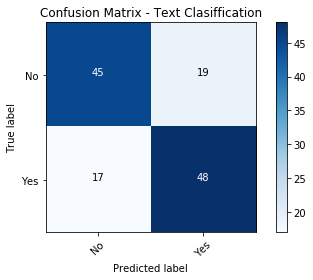

In [62]:
classes = ["No", "Yes"]

plt.figure()
plt.imshow(confusion_matrix_result, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Text Clasiffication")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

text_format = 'd'
thresh = confusion_matrix_result.max() / 2.
for row, column in itertools.product(range(confusion_matrix_result.shape[0]), range(confusion_matrix_result.shape[1])):
    plt.text(column, row, format(confusion_matrix_result[row, column], text_format),
             horizontalalignment="center",
             color="white" if confusion_matrix_result[row, column] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()

In [84]:
# # SGD classifier
# # https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

# from sklearn.linear_model import SGDClassifier
# # text_clf_sgd = Pipeline([('tfidf', TfidfVectorizer()), 
# #                      ('clf', SGDClassifier(loss='hinge', penalty='l2', 
# #                                            alpha=1e-3, random_state=42,
# #                                            max_iter=5, tol=None)),])


# sgd = SGDClassifier(loss='hinge', penalty='l2',
#                     alpha=1e-3, random_state=42,
#                     max_iter=5, tol=None)
# sgd.fit(Train_X_Tfidf,Train_Y)


# # make predictions for test data
# y_pred = sgd.predict(Test_X_Tfidf)
# prediction_sgd = [round(value) for value in y_pred]

# # evaluate predictions
# # print("sgd Accuracy Score -> ",accuracy_score(prediction_sgd, Test_Y)*100)

# confusion_matrix_result = confusion_matrix(Test_Y, predictions_sgd)
# print("Confusion matrix \n",confusion_matrix_result)
# print("\n Classification report \n",classification_report(Test_Y, predictions_sgd))
# print("\n sgd accuracy score -- > ",accuracy_score(Test_Y, predictions_sgd)*100)

# # text_clf_sgd.fit(Train_X,Train_Y)  
# # # Pipeline(...)
# # test_x = [(input())]
# # predicted_sgd = text_clf_sgd.predict(test_x)
# # for x in predicted_sgd:
# #     print(x)
# # # np.mean(predicted == Test_Y)            
# # # 0.9101...

In [85]:
from keras.models import Sequential
from keras import layers

input_dim = Train_X_Tfidf.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

# xgb.fit(Train_X_Tfidf,Train_Y)
history = model.fit(Train_X_Tfidf,Train_Y,
                    epochs=100,
                    verbose=False,
                    validation_data=(Test_X_Tfidf, Test_Y),
                    batch_size=10)

loss, accuracy = model.evaluate(Train_X_Tfidf,Train_Y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy,precision = model.evaluate(Test_X_Tfidf, Test_Y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Using TensorFlow backend.
/home/rounak/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rounak/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rounak/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rounak/.local/lib/python3.6/site-packages/tensorflow/python

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7690      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 7,701
Trainable params: 7,701
Non-trainable params: 0
_________________________________________________________________
Training Accuracy: 0.9863


ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:

# # # First XGBoost model for Pima Indians dataset
# # from numpy import loadtxt
# # from xgboost import XGBClassifier
# # from sklearn.model_selection import train_test_split
# # from sklearn.metrics import accuracy_score
# # # load data
# # dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# # # split data into X and y
# # X = dataset[:,0:8]
# # Y = dataset[:,8]
# # # split data into train and test sets
# # seed = 7
# # test_size = 0.33
# # X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# # # fit model no training data
# model = XGBClassifier()
# model.fit(X_train, y_train)
# # make predictions for test data
# y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]
# # evaluate predictions
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
# %matplotlib inline

# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12,5))
# sns.countplot(x=bbc_text_df.category, color='green')
# plt.title('BBC text class distribution', fontsize=16)
# plt.ylabel('Class Counts', fontsize=16)
# plt.xlabel('Class Label', fontsize=16)
# plt.xticks(rotation='vertical');

In [ ]:
# # Step - a : Remove blank rows if any.
# Corpus['comment'].dropna(inplace=True)

# # Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
# Corpus['comment'] = [entry.lower() for entry in Corpus['comment']]

# # Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
# Corpus['comment']= [word_tokenize(entry) for entry in Corpus['comment']]

# # Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# # WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
# tag_map = defaultdict(lambda : wn.NOUN)
# tag_map['J'] = wn.ADJ
# tag_map['V'] = wn.VERB
# tag_map['R'] = wn.ADV
# for index,entry in enumerate(Corpus['comment']):
#     # Declaring Empty List to store the words that follow the rules for this step
#     Final_words = []
#     # Initializing WordNetLemmatizer()
#     word_Lemmatized = WordNetLemmatizer()
#     # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
#     for word, tag in pos_tag(entry):
#         # Below condition is to check for Stop words and consider only alphabets
#         if word not in stopwords.words('english') and word.isalpha():
#             word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
#             Final_words.append(word_Final)
#     # The final processed set of words for each iteration will be stored in 'text_final'
#     Corpus.loc[index,'text_final'] = str(Final_words)
# Final_words

In [ ]:
# from tkinter import *
 
# window = Tk()
 
# window.title("Welcome to LikeGeeks app")
 
# window.geometry('350x200')
 
# lbl = Label(window, text="Hello")
 
# lbl.grid(column=0, row=0)
 
# txt = Entry(window,width=10)
# # txt.pack()
# # txt.focus_set()
# # insertedtext = txt.get()

# txt.grid(column=1, row=0)
 
# def clicked():
#     text = txt.get()
#     lower = text.lower()
#     words= []
#     remove_num = re.sub(r'\d+', '', lower)
#     print(remove_num,' \n\n')
# # punch = remove_num.translate(string.maketrans("",""), string.punctuation)
#     space = remove_num.strip()
#     print(space,' \n\n')
#     tokens = word_tokenize(space)
#     print(tokens,' \n\n')
#     stop_words = set(stopwords.words('english'))
#     print(stop_words,' \n\n')
#     result = [i for i in tokens if not i in stop_words]
#     print(result,' \n\n')
#     lemmatizer=WordNetLemmatizer()
# #     l=lemmatizer.lemmatize([word for word in result])
#     for word in result:
#         words.append(lemmatizer.lemmatize(word))
#     #Define class functions
#     print(words,' \n\n')
#     Test_X_Tfidf = Tfidf_vect.transform(words)
# #      = txt.get()
    
#     out = model.predict(Test_X_Tfidflol)
#     print(Test_X_Tfidflol)
# #     print(out[1])
    
#     if out[0] == 0:
#         lbl.configure(text="Suggestion is a NO")
#     else:
#         lbl.configure(text="Suggestion is a YES")
    
# btn = Button(window, text="Click Me", command=clicked)

# btn.grid(column=2, row=0)
# # c
# window.mainloop()